# Supervised Learning. Multiple Regression

We continue with the house prices dataset. But now we extend the model to multiple predictors. We explore power and limitations of *Normal Equations* and *Gradient Descent* methods in case of **multiple regression**.

In [2]:
cd "/Users/mk/Documents/ml/data"

/Users/mk/Documents/ml/data


In [8]:
#import packages for data storage and manipulation
import pandas as pd 
import numpy as np 
#import packages for plotting graphs
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#define type of graph display 
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]

In [27]:
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview
hp = pd.read_csv("./house_prices/train.csv") #import the dataset

In [28]:
hp = hp[hp['TotalBsmtSF'] < 5000] #remove outliers

In [6]:
p = np.poly1d(np.polyfit(hp.TotalBsmtSF,hp.SalePrice,1)) #fit the first order polynomial to the data

Text(0.5, 1.0, 'Relation between house price and total square feet of basement area (fitted line)')

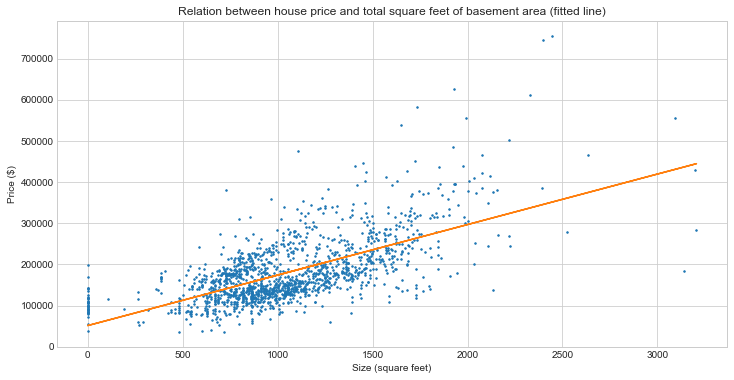

In [9]:
plt.plot(hp.TotalBsmtSF,hp.SalePrice,'o',hp.TotalBsmtSF,p(hp.TotalBsmtSF),markersize=1.5)
plt.xlabel("Size (square feet)")
plt.ylabel("Price ($)")
plt.title("Relation between house price and total square feet of basement area (fitted line)")

### Normal Equations. Summation Form

Recall, general form of the model:

$Y = f(X) + \epsilon$,

and the hypothesis function is of the form:

$f(X) = \beta_0 + \beta_1X$,

where $X$ is a predictor - house size - for house price.

Our aim is fit the data, that is, to minimize the sum of squared errors with respect to parameters $\beta_j$, $j=0,1$

$min_{\beta_0,\beta1}J(\beta_0,\beta_1)=\frac{1}{2n}\sum_{i=1}^{n}(y_i - (\beta_0 + \beta_1x_i))^2 = \frac{1}{2n}\sum_{i=1}^{n}(\epsilon_i)^2$

To find closed-form solution for the parameters we need to take partial derivatives of the cost function with respect to $\beta_j$, $j=0,1$ and set them equal to zero.
$\frac{\partial}{\partial \beta_j}J(\beta_0,\beta_1)=0$

In case of more than one predictor least squares estimator can be generalized in the matrix form.

### Normal Equations. Matrix Form

In case of multiple predictors our model takes the form:


\begin{equation}
\underset{n\times 1}{
\begin{bmatrix}
Y_1 \\ 
Y_2 \\ 
\vdots \\
Y_n
\end{bmatrix}}
=
\underset{n\times (k+1)}{
 \begin{bmatrix}
  1 & X_{11} & X_{21} & \dots & X_{k1}\\
  1 & X_{12} & X_{22} & \dots & X_{k2}\\
  \vdots & \vdots & \vdots & \dots & \vdots\\
  1 & X_{1n} & X_{2n} & \dots & X_{kn}
  \end{bmatrix}}
\times
\underset{(k+1)\times 1}{
\begin{bmatrix}
\beta_0 \\ 
\beta_1 \\ 
\vdots \\
\beta_k
\end{bmatrix}}
+
\underset{n\times 1}{
\begin{bmatrix}
\epsilon_1 \\ 
\epsilon_2 \\ 
\vdots \\
\epsilon_n
\end{bmatrix}}
\end{equation}


where $n$ is the total number of observations, $k$ is the number of parameters of the model, column of ones' is introduced in order not to lost a constant $\beta_0$.

or in a compact form:

$y = X\beta + \epsilon$

Our aim is to get the estimates of the parameter vector $\beta$.

In [108]:
hp.loc[:,:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


$y = X\beta + \epsilon$

\begin{equation}
\epsilon^T\epsilon = \underset{1\times n}{(\epsilon_1 \dots \epsilon_n)}
\times
\underset{n\times 1}{
 \begin{pmatrix}
  \epsilon_1 \\
  \vdots \\
  \epsilon_n 
  \end{pmatrix}}
  =
  \epsilon_1^2 + \epsilon_2^2 + \dots + \epsilon_n^2 
  =
  (y - X\beta)^T(y - X\beta)
\end{equation}

given $\epsilon = y - X\beta$

then we obtain

$(y - X\beta)^T(y - X\beta)=(y^T - \beta^TX^T)(y-X\beta)=y^Ty - y^TX\beta - \beta^TX^Ty + \beta^TX^TX\beta$

then we take the derivative with respect to $\beta$:

$\frac{\partial}{\partial \beta_j}\epsilon^T\epsilon=-2X^Ty + 2X^TX\beta=0$

$X^TX\beta=X^Ty$
this is what is called *Normal Equations* and by pre-multiplying both sides by $(X^TX)^{-1}$, we get:

$(X^TX)^{-1}X^TX\beta = (X^TX)^{-1}X^Ty$

becomes $I\beta = (X^TX)^{-1}X^Ty$, where $I$ is an identity matrix (e.g, $A^{-1}A=I$ linear transformation that does nothing) <b>only if $X^TX$ is invertable</b>

so could derive <b>unique solution</b> for parameter vector $\beta = (X^TX)^{-1}X^Ty$


### When matrix can be non-invertable?

There are two cases for matrix being not invertable:

1 - The number of observations (training examples) $n$ is less than the number of parameters (predictors) $k$ we would like to estimate.

2 - Some predictors are linearly dependent (perfectly collinear), e.g., in the excercise with house prices we may convert total basement area to square meters and include both sq meters and sq feet as predictors. But they are perfectly collinear, one variable can be derived from another ($1 feet^2 \approx 0.09 m^2$).

Solution:

1 - Increase number of observations or use *regularization* to get rid of redundant features.

2 - Use common sense, omit extremely correlated predictors, decrease dimensionality. 

### Multicollinearity

**The main question whether we build a model to make *predictions* or *inference*?**

If we are interested how a regressor affects an outcome variable, we care about precision of a coefficient (parameter) estimates. We interpret a regression coefficient as the average change in an outcome variable for the one unit change in a regressor *holding all other regressors fixed*.

*Multicollinearity* may occur when several *independent* predictors are highly correlated. This implies that changes in one of them won't keep correlated regressors constant. It makes estimates of the parameters for such predictors undistinguishable from one another. 

Multicollinearity does affect presision of parameter estimates, but it doesn't affect prediction or goodness-of-fit. If the goal is to make *predictions* rather than *inference* about predictors, we can safely live with severe multicollinearity.

Although, even if correlation is high and we are interested in model inference, it can be reasonable to include both variables in the model. The reason is that there can be a theoretical model that explains the relationship in question, e.g., level of education and social class. Unless the model converges it is possible to keep both. 

**What to do then?** 

If the number of features is not too high, you can apply bivariate techniques to check if some predictors are highly correlated - correlation matrix, scatter plot.

Alternatively, you can test for multicollinearity using *Variance Inflation Factor (VIF)* if you need to check multivariate setting.

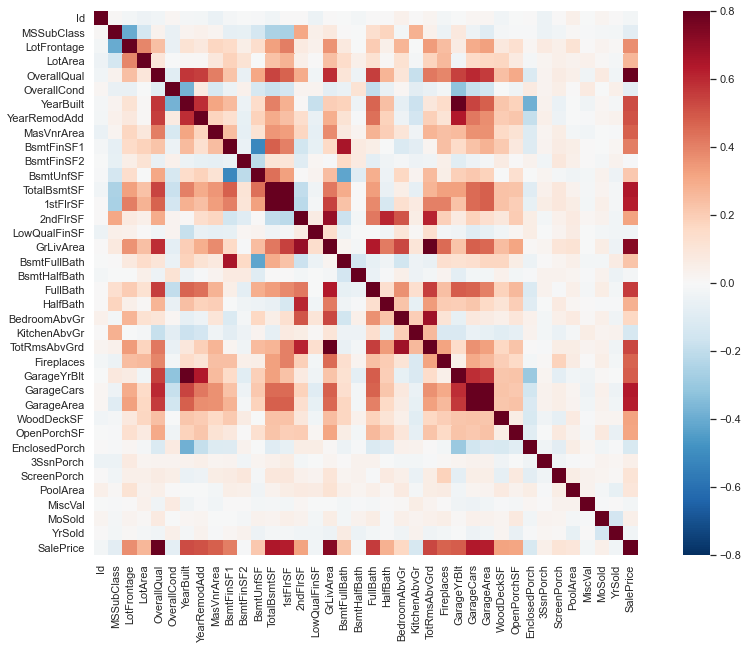

In [37]:
#correlation matrix
corrmat = hp.corr()
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(corrmat,vmin=-.8, vmax=.8, square=True, cmap='RdBu_r')

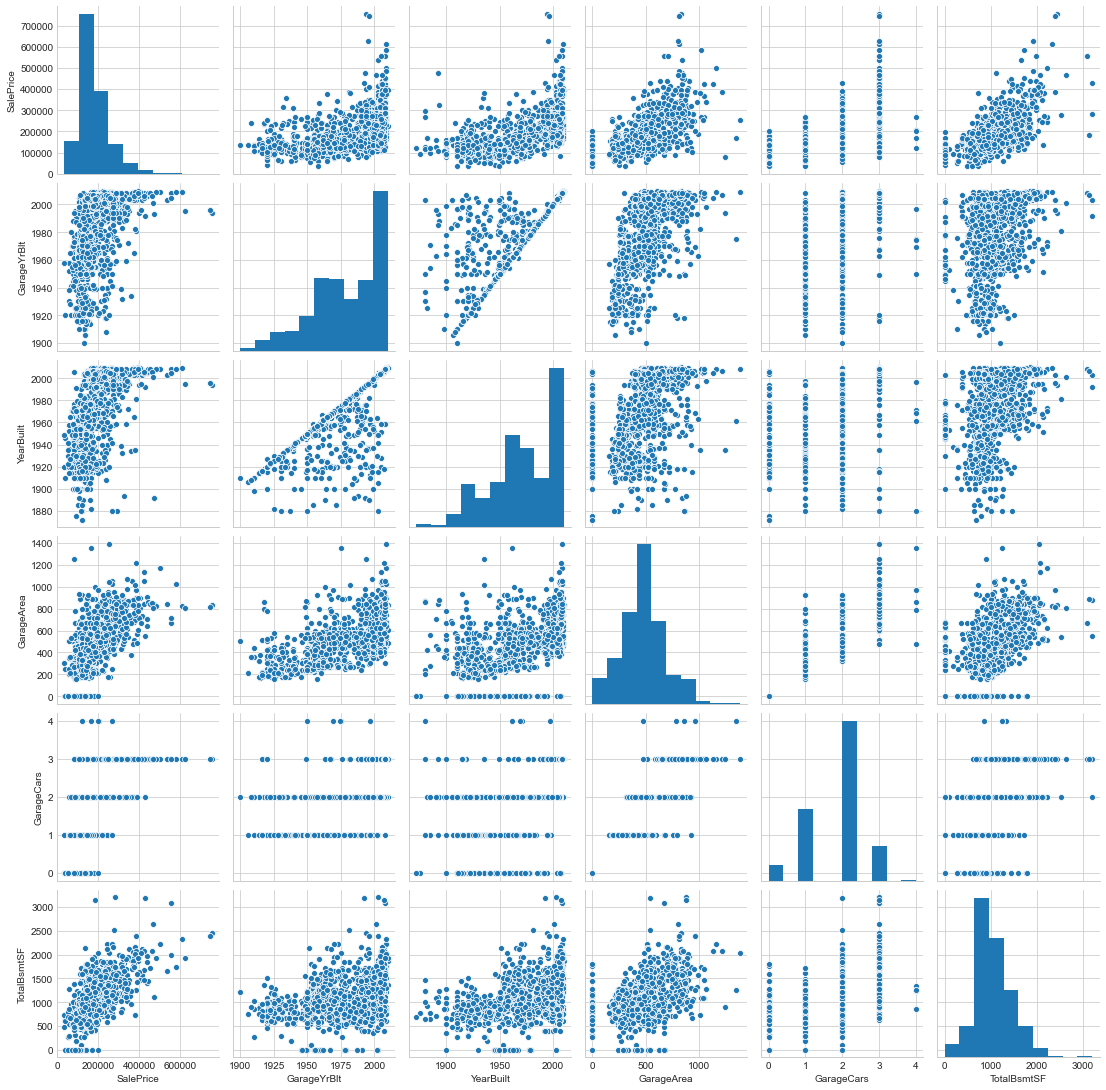

In [720]:
#scatter plots
cols = ['SalePrice', 'GarageYrBlt', 'YearBuilt','GarageArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(hp[cols], height = 2.5)
plt.show()

### R^2 the coefficient of determination

*Data mining* is the process of fitting many different models, trying many different independent variables, and primarily using statistical significance to build the final model rather than being guided by theory.

There are various metrics used to decide which model best fits the data.

$R^2$ is the *coefficient of determination* which measures *the goodness of fit for the linear regression model*. It ranges between 0 and 1 for no-fit and perfect fit respectively. Sometimes it can be negative if the fit is worse than a horizontal line.

$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i-f(X))^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}$

E.g., $R^2 = 0.86$ states that 86% of the variation in the outcome variable $y$ is explained by $X$ predictors. It might be a reasonable fit if we model a physical process which is precisely measured. If we are to model human behavior, which is less certain, it results in lower $R^2$ values, usually less than 50%.

It's important to note, that by adding more and more independent variables $R^2$ increases. It leads to *overfitting* of the model. 

*Overfitting* a model is a condition where a statistical model begins to describe the random error in the data rather than the relationships between variables. 

Overfitted model will fail to *generalize* to new data. Train model may be tuned to result in $R^2 = 0.98$, but will poorly fit to the test dataset $R^2 = 0.05$. 

Satellite measure of $R^2$ is $Adj R^2$. This is the $R^2$ adjusted for the number of predictors in the model. 


$Adj R^2 = 1 - \frac{(1-R^2)(n-1)}{n-k-1}$

$Adj R^2$ value decreases when the predictor doesn’t improve the model fit by a sufficient amount.


To narrow the set of models it is a good practice to conduct a 'field study' on the subject-area, that provides you with the domain knowledge.


### Variance Inflation Factor

**VIF procedure:**

1) Run linear regressions for each predictor $X_j,j=0,...,k$ in the form $X_1=\gamma_0 + \gamma_1X_2 + \dots + \gamma_{k-1}X_k+\nu$

2) Compute measure of fit $R_j^2$, defines how well variation in $X_j$ is described by other $X$'s

3) If $R_j^2$ is high, then $X_j$ is multicollinear with other independent variables

4) Compute $VIF = \frac{1}{1-R_j^2}$

**General rule of thumb:**

VIF takes values from 1 to Inf. 

equals 1 - there is no correlation between this independent variable and any others

between 1 and 5 - there is a moderate correlation, but it is not severe enough to warrant corrective measures

greater than 5 - there is a severe multicollinearity where the coefficients estimates are questionable

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1200 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [110]:
hp['Street'].value_counts()

Pave    1453
Grvl       6
Name: Street, dtype: int64

In [111]:
#assign numeric codes to string categories 
for col_name in hp.columns:
    if(hp[col_name].dtype == 'object'):
        hp[col_name]= hp[col_name].astype('category')
        hp[col_name] = hp[col_name].cat.codes

In [112]:
hp['Street'].value_counts()

1    1453
0       6
Name: Street, dtype: int64

In [10]:
#create array with independent variables
train_set = np.array(hp.loc[:,'MSSubClass':'SaleCondition'].dropna(axis=1).dropna())

In [126]:
train_set.shape[1]

76

In [12]:
#calculate VIFs
vif = [variance_inflation_factor(train_set, i) for i in range(train_set.shape[1])]

In [103]:
[v for v in vif if v < 5]

[3.4452289610553306,
 3.6506436412971137,
 1.0942424299677211,
 1.7116708106450842,
 4.839349297441484,
 1.2052342286587598,
 2.963733180545429,
 3.909503480855277,
 1.295596209756161,
 3.714147332697493,
 4.6261976804712095,
 4.52571486134321,
 2.005121727340319,
 1.9321585194553161,
 1.5043656515380193,
 1.0635920184978167,
 1.2539005867637796,
 1.5630041015786045,
 4.5141430595616105,
 1.2177012096347726]

In [13]:
#convert list to dataframe
vif_df = pd.DataFrame(vif,index=hp.loc[:,'MSSubClass':'SaleCondition'].dropna(axis=1).dropna().columns,columns=['vif'])
vif_df = vif_df.replace([np.inf, -np.inf], np.nan).dropna()

In [14]:
vif_df.sort_values(by='vif')

,vif
3SsnPorch,1.063592
Utilities,1.094242
RoofMatl,1.205234
MiscVal,1.217701
ScreenPorch,1.253901
...,...
Street,287.597419
PoolQC,591.406447
YearRemodAdd,25709.946097
YearBuilt,31288.905661


In [15]:
vif_df[vif_df['vif'] < 5].sort_values(by='vif')

,vif
3SsnPorch,1.063592
Utilities,1.094242
RoofMatl,1.205234
MiscVal,1.217701
ScreenPorch,1.253901
BsmtHalfBath,1.295596
EnclosedPorch,1.504366
Fence,1.563004
LandSlope,1.711671
OpenPorchSF,1.932159


### Gradient Descent. Multiple Regression

Now let's get back to the Gradient Descent algorithm. The multiple regression form is as follows.

repeat until convergence {
    $\beta_j = \beta_j - \alpha \frac{\partial}{\partial \beta_j}J(\beta),
    \\
    \text{where} \space \beta \space \text{is a parameter vector}$
}

and by taking partial derivatives with respect to $\beta$ it is equivalent to:

repeat until convergence {
    $\beta_j = \beta_j - \alpha \frac{1}{n}\sum_{i=1}^{n}(f(x_i) - y_i)x_{ji},\\
    \text{where} \space j=0,\dots,k, \\n \space \text{is sample size},\\ k \space \text{number of features} \\ X_0=1$
}

### Feature scaling

**Aim:** Normalize the range of features such that they are on a similar scale for Gradient Descent to converge more quickly.

The step should be done before running of Gradient Descent algorithm. And it is optional for Normal Equations method.

Initially features may differ in scale, e.g., house size in square feet and garage capacity.

In [38]:
hp['TotalBsmtSF'].describe() #Total basement area ranges btw 0 and 3206

count    1459.000000
mean     1053.966415
std       418.417408
min         0.000000
25%       795.500000
50%       991.000000
75%      1297.500000
max      3206.000000
Name: TotalBsmtSF, dtype: float64

In [36]:
hp['GarageCars'].describe() #Size of garage in car capacity ranges between 0 and 4

count    1459.000000
mean        1.766964
std         0.747546
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

In [10]:
y = hp['SalePrice']/1000 #create output column vector
X = np.column_stack((hp['TotalBsmtSF'],hp['GarageCars'])) #stack two column vectors of features into array

In [11]:
def gradient_descent(b,y,X):
    #function computes mse and partial derivatives for the cost function J(beta)
    f = X.dot(b).flatten() #construct predicted func with initial beta's, 1D array
    er = f-y #error (row vector)
    mse = (1/len(X))*np.sum(np.square(er)) #mean squared error (a value)
    pd = (1/len(X))*er.dot(X) #partial derivatives with respect to beta's (1 by 2 vector)
    return pd,mse

In [12]:
b = np.array((1, 46)) #set initial values for beta parameters
alpha = .00000001 #set learning rate
tolerance = 1e-5 #set tolerance value when algorithm is assumed to be converged
 
b_val = [] #keep beta values after each iteration
fits = [] #keep track of mean squared errors values

In [13]:
for i in range(1000):
    gradient, fit = gradient_descent(b,y,X) #unscaled X
    b_update = b - alpha * gradient
    #track history of beta's and mse
    b_val.append(b_update)
    fits.append(fit)
    #stop loop when converged
    if np.sum(abs(b_update - b)) < tolerance:
        print('Gradient Descent has converged after {} iterations'.format(i))
        break
    b = b_update

Gradient Descent has converged after 546 iterations


In [14]:
b

array([ 0.0940826 , 45.99859592])

Text(0, 0.5, 'Mean Squared Errors')

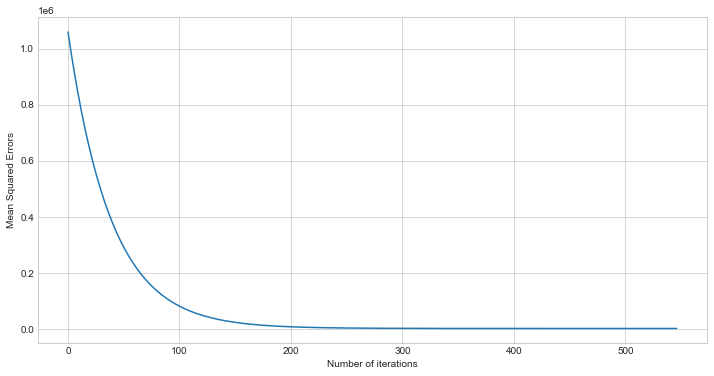

In [16]:
plt.plot(range(len(fits)),fits)
plt.xlabel("Number of iterations")
plt.ylabel("Mean Squared Errors")

In [17]:
b_val = np.array(b_val) #convert list of beta values into array
fits = np.sort(np.array(fits))#sort mse values from lowest to highest for contour plots

In [18]:
#keep beta1 and beta2 values within equally spaced range
b1 = np.linspace(b[0]-.5, b[0]+.5, 100) #X axis
b2 = np.linspace(-b[1]*10, b[1]*10, 100) #Y axis
mse_vals = np.zeros(shape=(b1.size, b2.size)) #Z axis

In [19]:
#compute mse values for each combination of parameters beta_1 and beta_2
for i, value1 in enumerate(b1):
    for j, value2 in enumerate(b2):
        b_temp = np.array((value1,value2))        
        mse_vals[i, j] = gradient_descent(b_temp,y,X)[1]

In [206]:
for i, value1 in enumerate(b1):
    print(i,value1)

0 -824.7165329579625
1 -808.0555928982056
2 -791.3946528384489
3 -774.733712778692
4 -758.0727727189352
5 -741.4118326591783
6 -724.7508925994216
7 -708.0899525396648
8 -691.4290124799079
9 -674.7680724201512
10 -658.1071323603943
11 -641.4461923006374
12 -624.7852522408807
13 -608.1243121811239
14 -591.463372121367
15 -574.8024320616103
16 -558.1414920018534
17 -541.4805519420966
18 -524.8196118823398
19 -508.15867182258296
20 -491.4977317628261
21 -474.8367917030693
22 -458.1758516433125
23 -441.51491158355566
24 -424.85397152379886
25 -408.19303146404206
26 -391.5320914042852
27 -374.8711513445284
28 -358.2102112847716
29 -341.54927122501476
30 -324.88833116525797
31 -308.22739110550117
32 -291.5664510457443
33 -274.90551098598746
34 -258.2445709262307
35 -241.58363086647387
36 -224.92269080671701
37 -208.26175074696027
38 -191.60081068720342
39 -174.93987062744657
40 -158.2789305676897
41 -141.61799050793297
42 -124.95705044817612
43 -108.29611038841927
44 -91.63517032866253
45 -74

In [209]:
mse_vals.shape

(100, 100)

Text(0, 0.5, 'beta2')

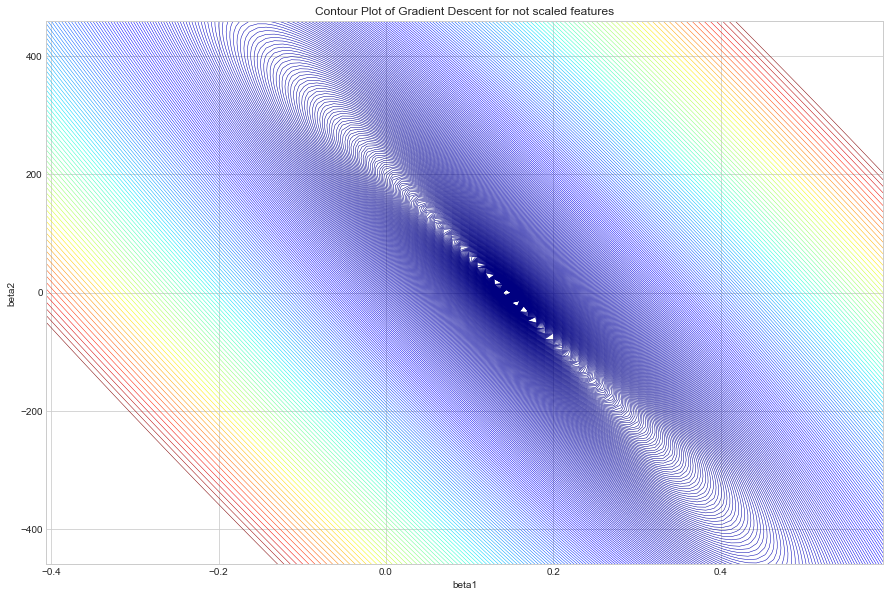

In [710]:
plt.contour(b1, b2, mse_vals,levels=fits, linewidths=.5,cmap='jet')
plt.title("Contour Plot of Gradient Descent for not scaled features")
plt.xlabel("beta1")
plt.ylabel("beta2")

**Standard scaler (zero-mean unit variance)**

Many ML algorithms assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

$x_j = \frac{x_{ji}-\mu_j}{\sigma_j}$

**MinMax scaler**

For cases in which the standard scaler might not work so well, if the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.

$x_j = \frac{x_{ji}-min(x_j)}{max(x_j)-min(x_j)}$



Too small range is als problematic, e.g, $-0.0001<X<0.0001$


Let's see the difference when we add feature scaling.

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
std_scaler = StandardScaler() #zero-mean, unit variance normalization     
mm_scaler = MinMaxScaler() #[0,1] range of transformation

X_mm_scaled = mm_scaler.fit_transform(X)
X_scaled = std_scaler.fit_transform(X)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
#first feature scaled range
np.amin(X_mm_scaled[0]),np.amax(X_mm_scaled[0]),np.amin(X_scaled[0]),np.amax(X_scaled[0])

(0.26699937616968183, 0.5, -0.473293629168853, 0.31184183888055833)

In [717]:
#second feature scaled range
np.amin(X_mm_scaled[1]),np.amax(X_mm_scaled[1]),np.amin(X_scaled[1]),np.amax(X_scaled[1])

(0.3936369307548347, 0.5, 0.31184183888055833, 0.4973619898659755)

In [23]:
b = np.array((-5, -5)) #set initial values for beta parameters
alpha = .1 #set learning rate
tolerance = 1e-3 #set tolerance value when algorithm is assumed to be converged
 
b_val = [] #keep beta values after each iteration
fits = [] #keep track of mean squared errors values

In [24]:
for i in range(1000):
    gradient, fit = gradient_descent(b,y,X_scaled) #scaled X
    b_update = b - alpha * gradient
    #track history of beta's and mse
    b_val.append(b_update)
    fits.append(fit)
    #stop loop when converged
    if np.sum(abs(b_update - b)) < tolerance:
        print('Gradient Descent has converged after {} iterations'.format(i))
        break
    b = b_update

Gradient Descent has converged after 67 iterations


In [508]:
b

array([35.52727736, 34.78251564])

In [711]:
#backward transformation of scaled to non scaled parameter estimates
35.52727736/np.std(hp['TotalBsmtSF']),34.78251564/np.std(hp['GarageCars']) 

(0.08493781132633703, 46.54486196453886)

Text(0, 0.5, 'Mean Squared Errors')

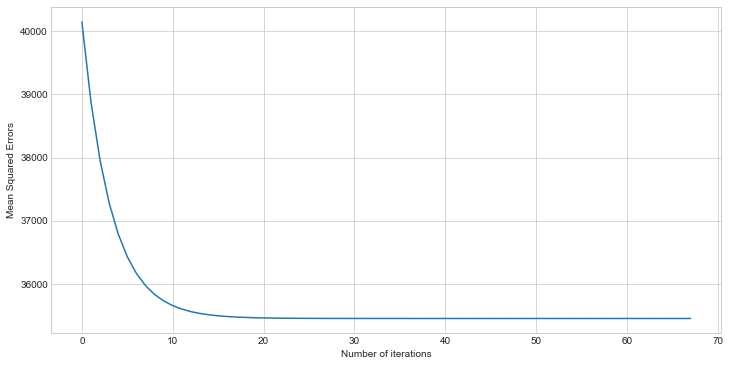

In [25]:
plt.plot(range(len(fits)),fits)
plt.xlabel("Number of iterations")
plt.ylabel("Mean Squared Errors")

In [466]:
b_val = np.array(b_val) #convert list of beta values into array
fits = np.sort(np.array(fits))#sort mse values from lowest to highest for contour plots

In [467]:
#keep beta1 and beta2 values within equally spaced range
b1 = np.linspace(b[0]-30, b[0]+30, 100) #X axis
b2 = np.linspace(b[1]-30, b[1]+30, 100) #Y axis
mse_vals = np.zeros(shape=(b1.size, b2.size)) #Z axis

In [468]:
#compute mse values for each combination of parameters beta_1 and beta_2
for i, value1 in enumerate(b1):
    for j, value2 in enumerate(b2):
        b_temp = np.array((value1,value2))        
        mse_vals[i, j] = gradient_descent(b_temp,y,X_scaled)[1]

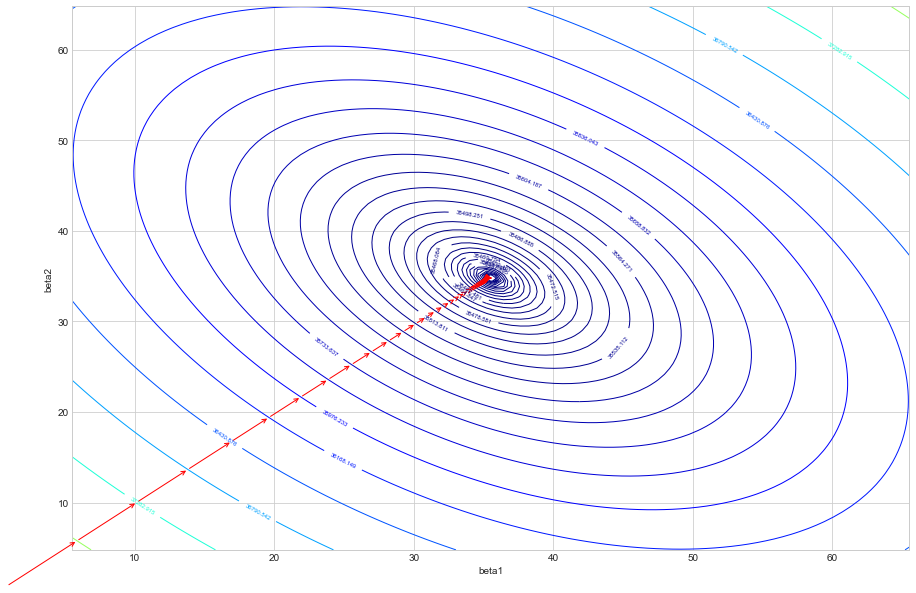

In [469]:
p = plt.contour(b1, b2, mse_vals,cmap='jet',levels=fits,linewidths=1)
plt.clabel(p, inline=1, fontsize=6)
plt.title("Contour Plot of Gradient Descent for scaled features")
plt.xlabel("beta1")
plt.ylabel("beta2")
for i in range(len(b_val) - 1):
    plt.annotate('', xy=b_val[i + 1, :], xytext=b_val[i, :],
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')

# Supervised Learning. Classification. Logistic Regression

### Classification problem

Classification is a process of predicting a *qualitative response* (default probability, fraud probability, product category, etc.). This type of problems happen more often than Regression problems with *quantitative response* (sales, prices, volumes, etc.).

Here the output Y (target) is a *qualitative* (*categorical*) variable, rather than *quantitative*. It takes values (*classes*) either 1 - malignant or 0 - benign. 

In case of just *two classes*, the problem is known as a **binary classification**, $Y \in \{0,1\}$.

In case of *multiple classes*, the problem is known as **multi-class classification**, e.g., $Y \in \{0,1,2,3\}$

### Binary Classification

Suppose we are given the dataset with characteristics of biopsy results for the breast cancer patients. And we would like to predict whether a patient's tumor is malignant or benign. 

In [114]:
#load Wisconsin Breast Cancer dataset which records clinical measurements of breast cancer tumors
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [115]:
#Bunch object dictionary 
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

<img src="img\cancer.png">

In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [116]:
#construct dataframe from np array
df=pd.concat([pd.DataFrame(cancer.target,columns=['target']),pd.DataFrame(cancer.data,columns=cancer.feature_names)],axis=1)

In [17]:
df

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
pd.crosstab(df.target,df.target.count())

col_0,569
target,
0,212
1,357


In [117]:
df['target'].replace([0,1],[1,0],inplace=True)

In [341]:
pd.crosstab(df.target,df.target.count())

col_0,569
target,
0,357
1,212


Solving classification problem via linear regression is a bad idea. In case of multiple *unordered* classes, the distance between classes is meaningless and changes in coding may affect results. In case of just two classes, it is possible to use linear regression, but the main drawback is that the range of predicted values $f(X)$ can fall outside of the desired interval of $[0,1]$.

Logistic Regression is the method that deals with both binary and multi classification problems smoothly.

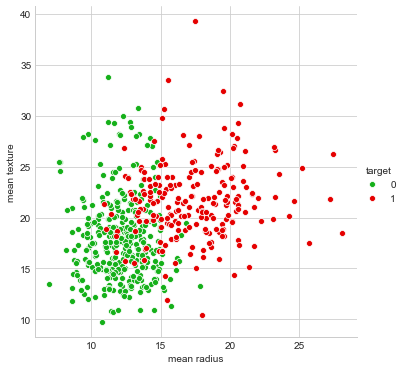

In [343]:
sns.pairplot(x_vars=["mean radius"], y_vars=["mean texture"], data=df, hue="target",palette=sns.xkcd_palette(['green','red']), height=5)

Scatter plot of two features - mean radius and mean grayscale intensity of a cell - colored with respect to the tumor type, shows distinct pattern. With the rise of both with features the chance that the tumor is malignant rises. This relation is confirmed by the boxplots plotted below.

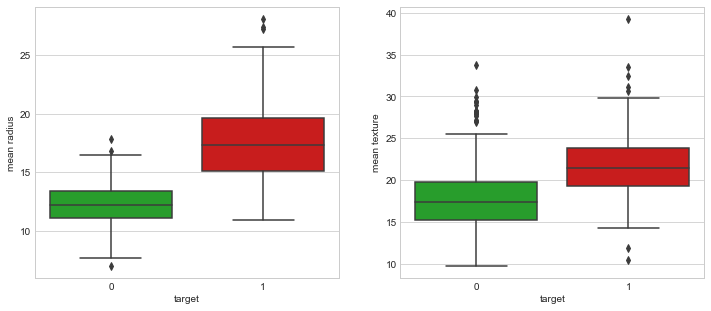

In [345]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.boxplot(x="target", y="mean radius", data=df,palette=sns.xkcd_palette(['green','red']),ax=axes[0])
sns.boxplot(x="target", y="mean texture", data=df,palette=sns.xkcd_palette(['green','red']),ax=axes[1])

#### Linear Regression vs. Logistic Regression

To illustrate the difference in modeling classification problems via Linear Regression vs. Logistic Regression let's fit the cancer data using both.

In [346]:
#fit linear regression with least squares
p = np.poly1d(np.polyfit(df['mean radius'],df['target'],1))

In [119]:
from sklearn.linear_model import LogisticRegression

In [492]:
clf1 = LogisticRegression(solver='liblinear').fit(np.array(df['mean radius']).reshape((-1,1)),df['target'])

In [493]:
clf1.coef_

array([[0.54291739]])

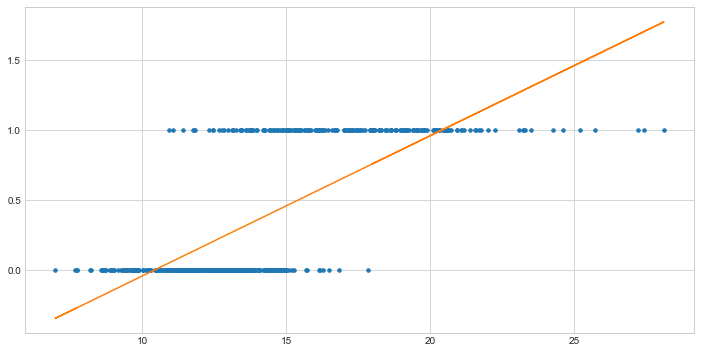

In [494]:
plt.plot(df['mean radius'],df['target'],'o',df['mean radius'],p(df['mean radius']),markersize=3.5)

Linear Regression fits the probabilities of tumor being malignant or benign outside of the interval $[0,1]$, whereas Logistic Regression doesn't have this problem. As expected probabilities lie between 0 and 1.

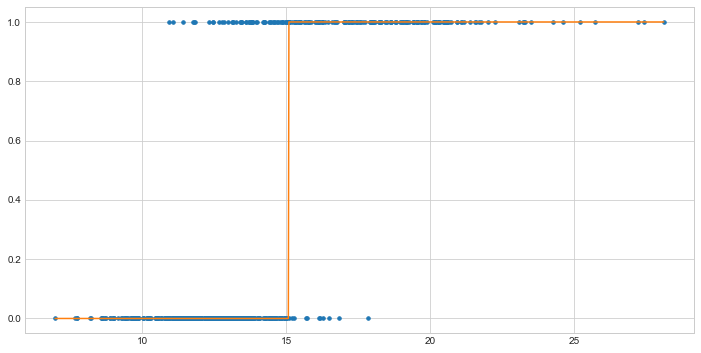

In [495]:
plt.plot(df['mean radius'],df['target'],'o',np.sort(df['mean radius']),np.sort(clf1.predict(np.array(df['mean radius']).reshape((-1,1)))),markersize=3.5)

In Logistic Regression hypothesis function takes the form:

## $f(X) = \frac{1}{1+e^{-(X\beta)}}$

Rather than modeling the response $Y$ directly, logistic regression models the probability that $Y$ belongs to a particular category. 

It can be interpreted as an estimated probability that $Y=1$, given $X$.

$f(X) = Pr(y=1|X)$ 

and

$1-f(X) = Pr(y=0|X) = 1 - Pr(y=1|X)$

Say, estimated probability $Pr(y=1|mean area = 14)=0.1$ we treat as there is 10% chance that patient's tumor is malignant.

#### Decision boundary

One might choose the probability threshold for the assignment of labels $Y=0$ or $Y=1$ for the predictions. Here we've chosen 0.5 value. In case more conservative predictions are needed the threshold can be below 0.5. 

This value is defined as a *decision boundary*.

We can visualize decision boundary for the case with two explanatory features: mean radius and mean texture. 

In [120]:
clf = LogisticRegression(solver='liblinear').fit(np.column_stack((df['mean radius'],df['mean texture'])),df['target'])

In [121]:
clf.intercept_,clf.coef_ #estimated coefficients for the features

(array([-8.70624244]), array([[0.50702007, 0.05304933]]))

In [122]:
clf.sparsify() #convert from numpy.ndarray to a scipy.sparse matrix

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

(0.0, 40.0)

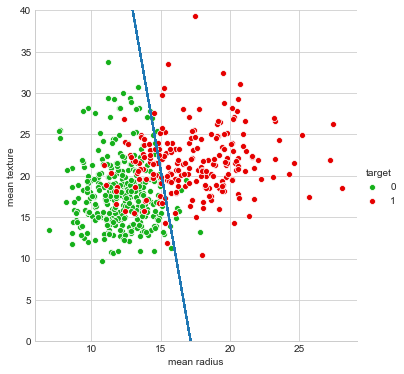

In [499]:
sns.pairplot(x_vars=["mean radius"], y_vars=["mean texture"], data=df, hue="target",palette=sns.xkcd_palette(['green','red']), height=5)
#clf.intercept_[0] + clf.coef_.data[0]*x1+clf.coef_.data[1]*x2 >= 0 (Y=1)
plt.plot(df['mean radius'],(-clf.intercept_[0]-clf.coef_.data[0]*df['mean radius'])/clf.coef_.data[1])
plt.ylim((0,40))

Let's see how this decision boundary is derived in order to understand how exactly the algorithm assignes predicted classes for the outcome variable.

Text(0, 0.5, 'f(X)')

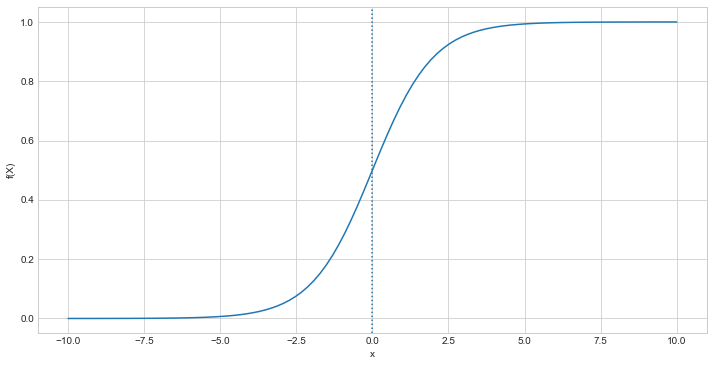

In [500]:
#plot logistic function for arbitrary range of x values
x = np.linspace(-10, 10, 100) #evenly spaced numbers over the interval
f = 1/(1 + np.exp(-x)) 
  
plt.plot(x, f) 
plt.axvline(linestyle='dotted')
plt.xlabel("x") 
plt.ylabel("f(X)") 

$Y=1$ when $f(X) \geq 0.5$, i.e. $x \geq 0$

and 

$Y=0$ when $f(X) < 0.5$, i.e. $x < 0$

#### Cost function

We can't use the cost function of least squares for logistic regression. Because of sigmoid function, it is non-convex and hence we can't guarantee to converge to the global minimum.

Instead we use the following form for the cost function. It defines the penalty that algorithm pays for the difference between predicted probabilities $f(X)$ and the actual class value $y$.

$J(\beta) = \frac{1}{n}\sum_{i=1}^{n}Cost(f(X),y_i)$, where

\begin{equation}
Cost(f(X),y) = \begin{cases}
-log(f(X)) & \quad y=1, \\
-log(1-f(X)) & \quad y=0.
\end{cases}
\end{equation}

or equivalently

$Cost(f(X),y) = -y\log(f(X)) - (1-y)\log(1-f(X))$

this cost function is known as a *log likelihood function*.

In [417]:
clf.classes_ #check order of classes

array([0, 1])

Let's plot predicted probabilities $f(X)$ against the cost function $Cost(f(X),y)$ to see the correspondence between them.

In [123]:
X = np.column_stack((df['mean radius'],df['mean texture']))
cf0 = clf.predict_log_proba(X)[:,0] #Y=0
cf1 = clf.predict_log_proba(X)[:,1] #Y=1
hf = clf.predict_proba(X)[:,1]

[Text(0, 0.5, 'Cost(f(X),y)'), Text(0.5, 0, 'f(X)'), Text(0.5, 1.0, 'y=1')]

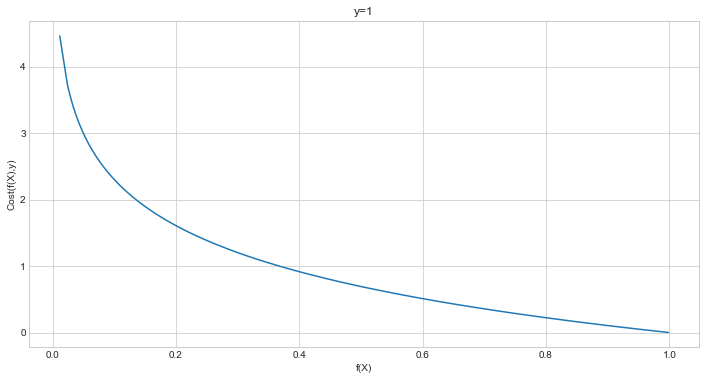

In [124]:
sns.lineplot(hf,-cf1).set(xlabel="f(X)",ylabel="Cost(f(X),y)",title="y=1")

As can be seen from the graph above, when both predicted probability $f(X)$ and actual class $y$ are equal to 1, the cost $Cost(f(X),y)$ is 0. And as predicted values tend to 0, the cost function tends to $\infty$.

On the other hand, the graph below, if we know that the actual class $y$ is equal to 0, but the algorithm predicts $f(X) = 1$, we penalize the cost function $Cost(f(X),y)$ and it tends to $\infty$.

[Text(0, 0.5, 'Cost(f(X),y)'), Text(0.5, 0, 'f(X)'), Text(0.5, 1.0, 'y=0')]

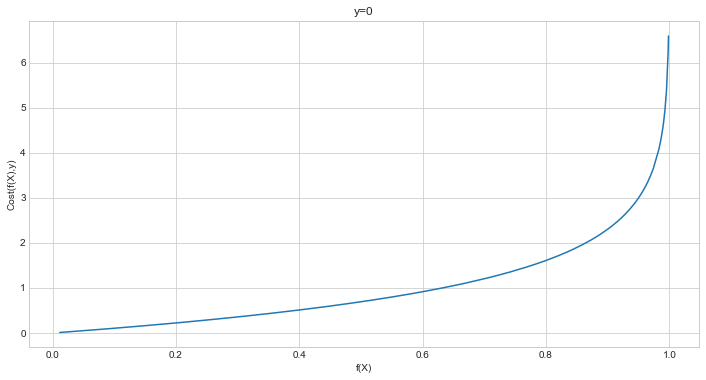

In [125]:
sns.lineplot(hf,-cf0).set(xlabel="f(X)",ylabel="Cost(f(X),y)",title="y=0")

#### Maximum Likelihood Estimator

We can obtain parameter estimates for our model using *Maximum Likelihood Estimator* or using an optimization algorithm, e.g., *Gradient descent*.

*Maximum Likelihood Estimator* is a general approach that can be used to fit non-linear models. It specifies the objective function, whereas *Gradient descent* is just one of the optimization algorithms that finds the optimal solution. 

Gradient descent and other optimization algorithms can be used to solve a Maximum Likelihood problem, and the result will be the Maximum Likelihood estimator. 

The basic intuition behind using Maximum Likelihood is to fit a logistic regression model such that estimates for $\beta$, when plugged into $f(X)$ to make predictions whether tumor is malignant or benign, corresponds as closely as possible to the actual class of the tumor 0 or 1.

#### Gradient descent

Finally, to fit coefficients $\beta$ for our model and make predictions for probabilities of a tumor being mlignant or benign, we need to minimize the cost function.


$min_{\beta}J(\beta)=\frac{1}{n}\sum_{i=1}^{n}(-y_i\log(f(X))-(1-y_i)\log(1-f(X))$

Using Gradient descent algorithm:

**repeat until convergence** \{
    $\beta_j = \beta_j - \alpha\frac{\partial}{\partial \beta_j}J(\beta)$
\}

and by taking the partial derivative of $J(\beta)$ with respect to $\beta_j$ we end up with:

**repeat until convergence** \{
    $\beta_j = \beta_j - \alpha\sum_{i=1}^{n}(f(X)-y_i)x_{ij}$
\}

And you may notice that this expression is equivalent to the one we obtained for the linear regression, the only difference is the definition of the hypothesis function $f(X)$.

For the linear regression $f(X)=X\beta$

For the logistic regression $f(X)=\frac{1}{1+e^(-X\beta)}$

#### Alternative optimization algorithms

The Gradient descent algorithm is easy in application and understanding. Although, in practice, you rarely use it. There are other more advanced optimization algorithms that can be applied to derive parameters $\beta$, e.g.,


- Newton-CG
- Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm
- Large Linear Classification
- Stochastic Average Gradient
- SAGA

The desired optimization algorithms can be specified via 'solver' parameter - ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’.

These algorithms are more sophisticated as:

- you don't need to set the learning rate manually
- they converge much faster than the primitive ones

No need to implement these algorithms by yourself or try to get into the computation routines, use ready libraries.

Which one to choose depends on the particular task you are trying to solve. You should follow basic recommendations from the official manuals of the library you use, which algorithm is the best choice:

<blockquote>
For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
</blockquote>

It's worth to try several algorithms to check whether results are robust.

#### Logistic Regression Coefficient Interpretation

Recall, that when we fit the model using linear regression, we interpret parameter $\beta_j$ as an average increase in the outcome $y$ given a one unit increase in $x_j$.

For the logistic regression we can't infer in the same manner. Here is a simple transformation of the hypothesis function that shows why.

recall that $f(X) = Pr(y=1|X) = \frac{1}{1+e^{-X\beta}}$

We can compute the *odds* as:

$\frac{f(X)}{1-f(X)} = e^{X\beta}$

and taking the log of bowth sides gives us the *log-odds* or *logit*:

$log(\frac{f(X)}{1-f(X)}) = X\beta$

The *logit* is linear in $X$. One unit increase in $x_j$ changes the *log-odds* by $\beta_j$ and since the relation between $f(X)$ and $X$ is non linear $\beta_j$ does not correspond to the change in $f(X)$ associated with a one unit
increase in $x_j$.

The amount that $f(X)$ changes due to a one unit change in $x_j$ will depend on the current value of $x_j$. 

Regardless of the value of $x_j$, if $\beta_j$ is positive then increasing $x_j$ will be associated with increasing $f(X)$, and if $\beta_j$ is negative then increasing $x_j$ will be associated with decreasing $f(X)$.

### Multi-class classification

Many linear classification models are for binary classification only, and don’t extend naturally to the multiclass case (with the exception of logistic regression). A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the **one-vs.-rest approach**.

In the **one-vs.-rest approach**, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes. To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its single class “wins,” and this class label is returned as the prediction.